atom: [ 0 30]
wght: [0.5 0.5]
sigm: 1
nu: 3
Generated samples: [ 2.99820941e+01 -5.29864694e-04 -5.86199651e-01  3.04946574e+01
  3.07276261e+01  1.80451724e-01  3.08985987e+01  2.83376549e+01
 -2.75501050e-01 -1.26077710e+00]


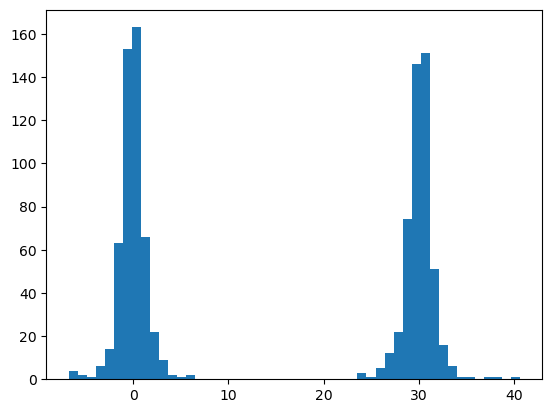

In [1]:
from scipy.stats import t
import numpy as np
from discrete_rv import DiscreteRV, assert_shape_equal
import matplotlib.pyplot as plt

class ModelStudentMixture:
    """
    Class for 1-d Student's t Mixture Model
    weights: ndarray of weights
    centers: ndarray of means
    sigma: standard deviations (scale parameter of t-distribution)
    nu: degrees of freedom for the t-distribution
    """
    def __init__(self, w=1, x=0, std=1, nu=5):
        """
        Initialize a Student Mixture model
        w: array of weights
        x: array of means
        std: scalar or array of standard deviations. If scalar, components share the same std.
        nu: scalar or array of degrees of freedom. If scalar, components share the same nu.
        """
        self.weights = np.asarray(w)
        self.centers = np.asarray(x)
        assert_shape_equal(self.weights, self.centers)

        if np.isscalar(std):
            self.sigma = std * np.ones(self.weights.shape)
        else:
            self.sigma = np.asarray(std)
        assert_shape_equal(self.weights, self.sigma)

        if np.isscalar(nu):
            self.nu = nu * np.ones(self.weights.shape)
        else:
            self.nu = np.asarray(nu)
        assert_shape_equal(self.weights, self.nu)

    def __repr__(self):
        return "atom: %s\nwght: %s\nsigm: %s\nnu: %s" % (
            self.centers,
            self.weights,
            self.sigma[0],
            self.nu[0],
        )

    
    def moments_t(self, k):
        """
        Compute the k-th moment of the Student's t-distribution with degrees of freedom nu.
        Parameters:
            k (int): Order of the moment
            nu (float): Degrees of freedom
        Returns:
            float: k-th moment if defined, otherwise None
        """
        if self.nu <= k:
            return None  # Moment undefined for nu <= k
        coef = (2 ** (k / 2)) * gamma((k + 1) / 2) * gamma((self.nu - k) / 2)
        denom = np.sqrt(np.pi *self.nu) * gamma(self.nu / 2)
        return coef / denom
    
    def mean_rv(self):
        """
        discrete rv for the means
        """
        if np.min(self.nu) >1 :
            return DiscreteRV(self.weights, self.centers)
        else:
            raise ValueError("The degree of freedom should be higher than 1 in order that the first moment exists")

    def std_rv(self):
        """
        discrete rv for the sigmas
        """
        if np.min(self.nu) > 2:
            return DiscreteRV(self.weights, self.sigma)
        else:
            raise ValueError("The degree of freedom should be higher than 2 in order that the moment 2 exists")



# Sampler
def sample_student_mix(model, num, seed=123):
        """
        Generate n random samples from the Student's t mixture model
        """
        np.random.seed(seed)
        idx = np.random.choice(model.centers.shape[0], size=num, replace=True, p=model.weights)
        x = model.centers[idx] + model.sigma[idx] * t.rvs(model.nu[idx], size=num)
        return x

# Example usage
if __name__ == "__main__":
    # Define the model
    weights = [0.5, 0.5]
    centers = [0, 30]
    sigma = [1, 1]
    nu = [3, 3]  # Degrees of freedom

    model = ModelStudentMixture(weights, centers, sigma, nu)
    print(model)

    # Generate samples
    samples = sample_student_mix(model, 1000, seed=123)
    print(f"Generated samples: {samples[:10]}")
    plt.hist(samples, bins=50)
    plt.show()